In [8]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn 
import statsmodels.api as sm
from ast import literal_eval
import math
from collections import Counter, OrderedDict
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor

In [2]:
train_data = pd.read_excel("tmdb-box-office-prediction/train.xlsx")

Data visualisation, and exploration:

In [5]:
train_data.columns


Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

In [6]:
cols = train_data.columns

In [7]:
train_data.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2015-02-20,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,2004-08-06,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,2014-10-10,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,2012-03-09,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2009-02-05,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


Some of the columns have dictionaries as entries, most often the reason for that is that they represent both the id and the name of the element 

Let's take a look at the columns:

In [8]:
train_data.isnull().sum(axis = 0) #Nb of NA per column

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

In [9]:
train_data.isnull().sum(axis = 0)/train_data.shape[0] #Percentage of NA per column

id                       0.000000
belongs_to_collection    0.798667
budget                   0.000000
genres                   0.002333
homepage                 0.684667
imdb_id                  0.000000
original_language        0.000000
original_title           0.000000
overview                 0.002667
popularity               0.000000
poster_path              0.000333
production_companies     0.052000
production_countries     0.018333
release_date             0.000000
runtime                  0.000667
spoken_languages         0.006667
status                   0.000000
tagline                  0.199000
title                    0.000000
Keywords                 0.092000
cast                     0.004333
crew                     0.005333
revenue                  0.000000
dtype: float64

# DATA CLEANING, FEATURE GEN, VIZ AND INITIAL ANALYSIS

### IDs

In [10]:
train_data[cols[0]] #ids, we can use the index instead

0          1
1          2
2          3
3          4
4          5
        ... 
2995    2996
2996    2997
2997    2998
2998    2999
2999    3000
Name: id, Length: 3000, dtype: int64

In [11]:
train_data = train_data.drop(cols[0], axis = 1)

### Collection

In [12]:
train_data[cols[1]] #Collection, a lot of NA, and relevant info is probably only that the movie belongs to a collection

0       [{'id': 313576, 'name': 'Hot Tub Time Machine ...
1       [{'id': 107674, 'name': 'The Princess Diaries ...
2                                                     NaN
3                                                     NaN
4                                                     NaN
                              ...                        
2995                                                  NaN
2996                                                  NaN
2997                                                  NaN
2998                                                  NaN
2999                                                  NaN
Name: belongs_to_collection, Length: 3000, dtype: object

In [13]:
collection_feature = train_data[cols[1]].isnull().astype('int')

In [14]:
train_data[cols[1]] = collection_feature

### Budget

In [15]:
train_data[cols[2]] #Budget, definitely interesting

0       14000000
1       40000000
2        3300000
3        1200000
4              0
          ...   
2995           0
2996           0
2997    65000000
2998    42000000
2999    35000000
Name: budget, Length: 3000, dtype: int64

In [16]:
train_data[cols[2]] = train_data[cols[2]]/train_data[cols[2]].std()

Text(0.5, 1.0, 'Scatter Plot of Revenue vs Budget')

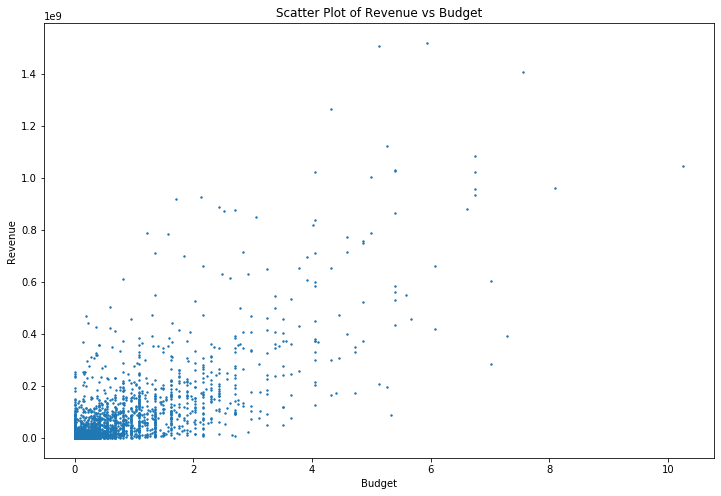

In [19]:
train_data.plot.scatter(x = cols[2], y= cols[-1], s = 2, figsize = (12, 8))
plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.title("Scatter Plot of Revenue vs Budget")

### Genres

In [20]:
train_data[cols[3]] #genres, notice that read as strings so fix that, then one hot encode it since keeping integers might confuse the models we're using

0                          [{'id': 35, 'name': 'Comedy'}]
1       [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
2                           [{'id': 18, 'name': 'Drama'}]
3       [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...
4       [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...
                              ...                        
2995    [{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...
2996    [{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...
2997    [{'id': 80, 'name': 'Crime'}, {'id': 28, 'name...
2998    [{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...
2999    [{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...
Name: genres, Length: 3000, dtype: object

In [21]:
train_data[cols[3]] = train_data[cols[3]].fillna("[]")

In [22]:
train_data[cols[3]] = [literal_eval(i) for i in train_data[cols[3]]]

In [23]:
nb_genres_per_film = train_data['genres'].apply(lambda x: len(x) if x != {} else 0)

Text(0.5, 1.0, 'Revenue as a Function of Number of Genres per Film')

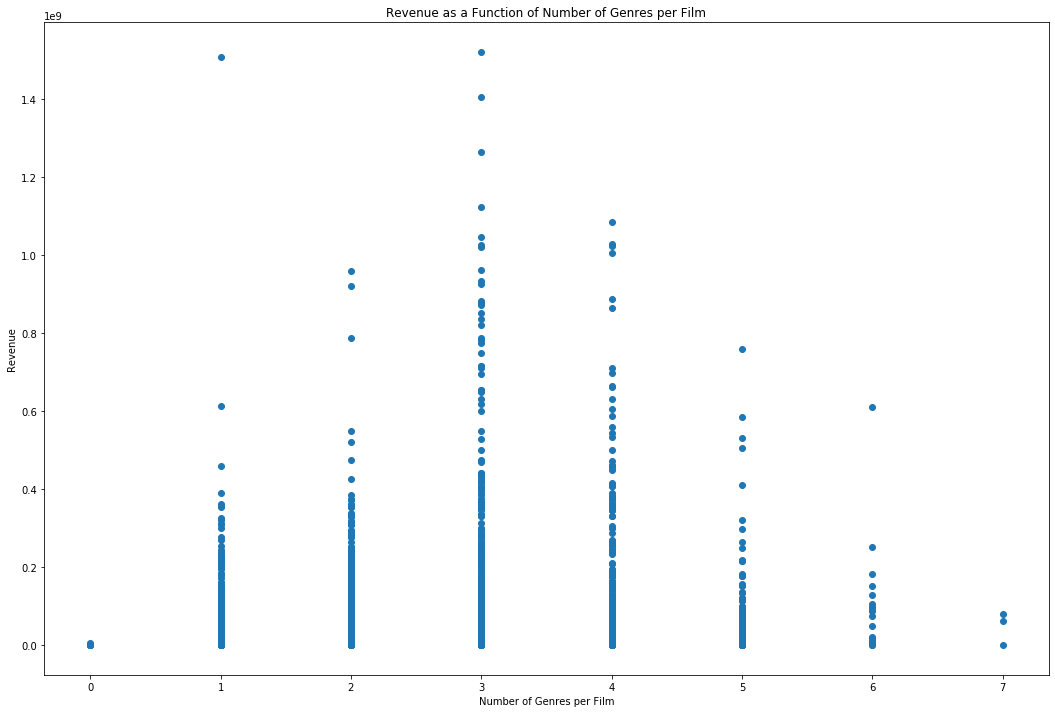

In [24]:
plt.figure(figsize = (18, 12))
plt.scatter(x = nb_genres_per_film, y = train_data["revenue"])#interesting 
plt.xlabel("Number of Genres per Film")
plt.ylabel("Revenue")
plt.title("Revenue as a Function of Number of Genres per Film")

In [25]:
list_of_genres = list(train_data['genres'].apply(lambda x: [i['name'] for i in x] ).values) #per movie

In [26]:
corpus_genres = ' '.join([i for j in list_of_genres for i in j])

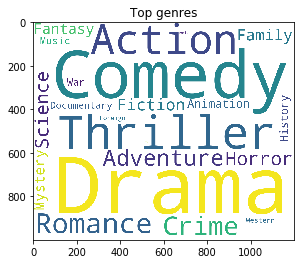

In [27]:
#Viz top genres here

wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      width=1200, height=1000).generate(corpus_genres)
plt.imshow(wordcloud)
plt.title('Top genres')
plt.show()

vectorizer = TfidfVectorizer()
tfidf1 = vectorizer.fit_transform(flat_list)
vectorizer.get_feature_names()

In [28]:
flat_list = [item for sublist in list_of_genres for item in sublist]

In [29]:
Counter(flat_list).most_common(15)

[('Drama', 1531),
 ('Comedy', 1028),
 ('Thriller', 789),
 ('Action', 741),
 ('Romance', 571),
 ('Crime', 469),
 ('Adventure', 439),
 ('Horror', 301),
 ('Science Fiction', 290),
 ('Family', 260),
 ('Fantasy', 232),
 ('Mystery', 225),
 ('Animation', 141),
 ('History', 132),
 ('Music', 100)]

In [30]:
genres =[i[0] for i in Counter(flat_list).most_common()]

In [31]:
train_data["genres"] = list_of_genres #Replacing the dictionaries by a list of names of the genres

In [33]:
#We now have binary columns representing the presence of genre for each movie
genres_cols = []
for g in genres:
    train_data["gr_" + g]= train_data["genres"].apply(lambda x:1 if g in x else 0)
    genres_cols.append("gr_" + g)

In [34]:
xx1 = int(np.floor(len(genres_cols)/3))

In [35]:
train_data["th1_genre"] = train_data[genres_cols[:xx1]].sum(axis = 1)
train_data["th2_genre"] = train_data[genres_cols[xx1:2*xx1]].sum(axis = 1)
train_data["th3_genre"] = train_data[genres_cols[2*xx1:]].sum(axis = 1)

In [36]:
train_data = train_data.drop("genres", axis = 1) #We drop the genres column
train_data = train_data.drop(genres_cols, axis = 1)

Text(0.5, 1.0, 'Revenue as a Function of Number of Genres per Film')

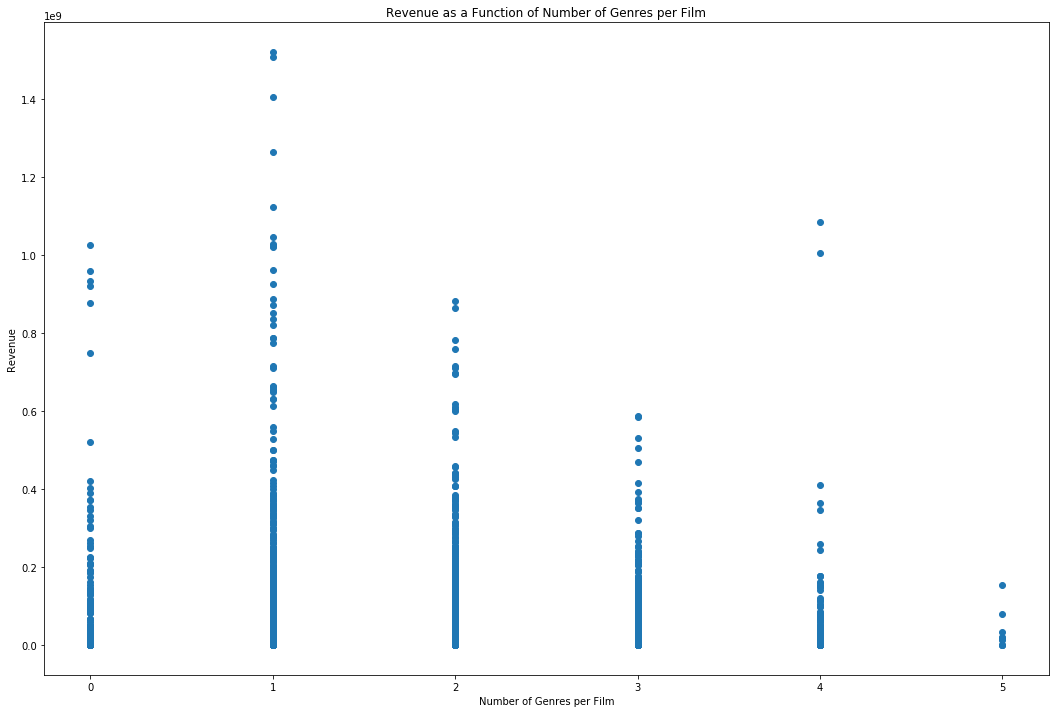

In [37]:
plt.figure(figsize = (18, 12))
plt.scatter(x = train_data["th1_genre"], y = train_data["revenue"])#interesting 
plt.xlabel("Number of Genres per Film")
plt.ylabel("Revenue")
plt.title("Revenue as a Function of Number of Genres per Film")

Text(0.5, 1.0, 'Revenue as a Function of Number of Genres per Film')

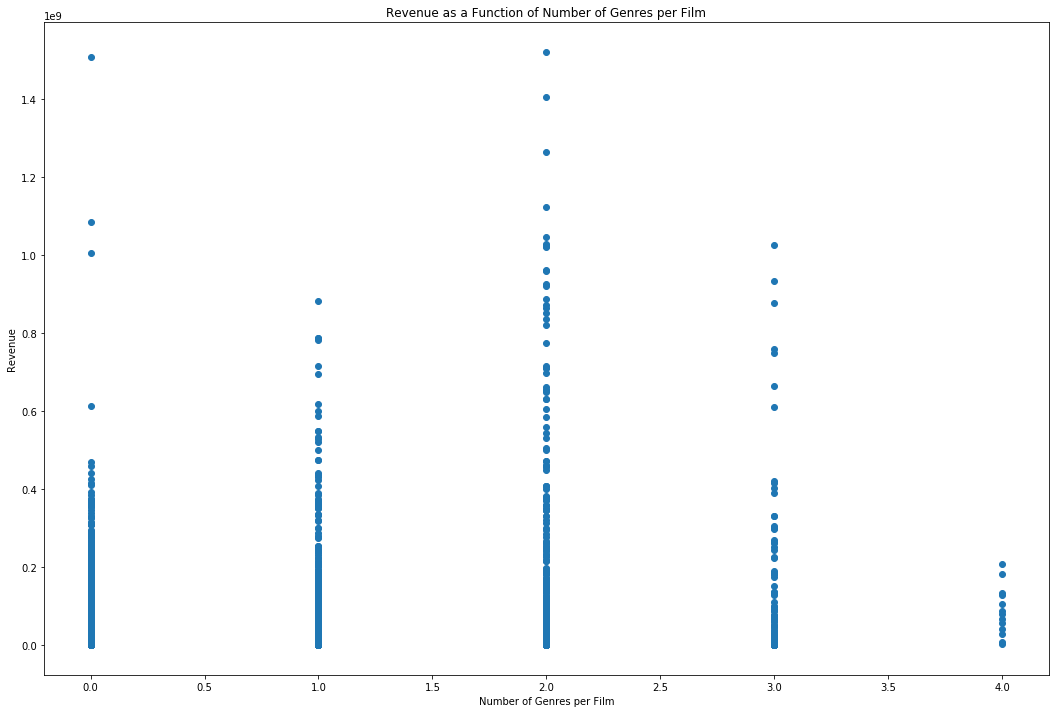

In [38]:
plt.figure(figsize = (18, 12))
plt.scatter(x = train_data["th2_genre"], y = train_data["revenue"])#interesting 
plt.xlabel("Number of Genres per Film")
plt.ylabel("Revenue")
plt.title("Revenue as a Function of Number of Genres per Film")

### Homepage

In [ ]:
train_data[cols[4]] = (train_data[cols[4]].isnull() == 0)/1 # Homepage, If they have a homepage or not

#### IMDB ID

In [ ]:
train_data[cols[5]] #imdbid, drop

In [ ]:
train_data = train_data.drop(cols[5], axis = 1)

### OG Language

In [ ]:
train_data[cols[6]] #og language, we drop

In [ ]:
og_langs = [i[0] for i in Counter(train_data[cols[6]].tolist()).most_common()]


In [ ]:
#We now have binary columns representing the og lang
og_lang_cols = []
for g in og_langs:
    train_data["oglang" + g]= train_data[cols[6]].apply(lambda x:1 if x in g else 0)
    og_lang_cols.append("oglang" + g)

In [ ]:
train_data["og_lang_top5sum"] = train_data[og_lang_cols[:5]].sum(axis = 1)
train_data["og_lang_othersum"] = train_data[og_lang_cols[5:]].sum(axis = 1)

train_data = train_data.drop(cols[6], axis = 1)
train_data = train_data.drop(og_lang_cols, axis = 1)

### OG Title

In [ ]:
train_data[cols[7]] #og title, drop

In [ ]:
train_data = train_data.drop(cols[7], axis = 1)

### Movie Description 

In [ ]:
train_data[cols[8]] #Desctiption,  drop 

In [ ]:
vectorizer = TfidfVectorizer(
            analyzer='word', lowercase = True, 
            ngram_range=(1, 1),
            min_df=5, max_df = 0.5, stop_words = "english")

vectorized_txt = vectorizer.fit_transform(train_data['overview'].fillna('').to_list())


#Looked into quick NLP but definitely not enough data for that and easier to focus on something else. Too complicated. 

In [ ]:
vectorized_txt.todense().shape

In [ ]:
pca = PCA(n_components = 0.3)
z = pca.fit_transform(vectorized_txt.todense())

In [ ]:
z.shape

In [ ]:
train_data = pd.concat([train_data, pd.DataFrame(z)], axis = 1)

In [ ]:
train_data = train_data.drop(cols[8], axis = 1) 

### POP Score

In [ ]:
train_data[cols[9]] #popularity score, but no real interpretation of what it means, just leave as is

### Poster link

In [ ]:
train_data[cols[10]] #drop

In [ ]:
train_data[cols[10]].isnull().sum()

In [ ]:
train_data = train_data.drop(cols[10], axis = 1)

### Prod Companies

In [ ]:
train_data[cols[11]] 

In [ ]:
train_data[cols[11]] = train_data[cols[11]].fillna("[]")

In [ ]:
train_data[cols[11]] = [literal_eval(i) for i in train_data[cols[11]]]

In [ ]:
list_of_prods_comps = list(train_data[cols[11]].apply(lambda x: [i['name'] for i in x] ).values) #per movie

In [ ]:
flat_list_prod_comps = [item for sublist in list_of_prods_comps for item in sublist]

In [ ]:
prod_comps = [i[0] for i in Counter(flat_list_prod_comps).most_common()]

In [ ]:
train_data[cols[11]] = list_of_prods_comps #Replacing the dictionaries by a list of names of the prod companies

In [ ]:
#We now have binary columns representing the presence of genre for each movie
prod_comps_colnames = []
for g in prod_comps:
    train_data["prod_comp_" + g]= train_data[cols[11]].apply(lambda x:1 if g in x else 0)
    prod_comps_colnames.append("prod_comp_" + g)

In [ ]:
train_data[prod_comps_colnames].sum(axis = 1)

In [ ]:
train_data["prod_comps_sumothers"] = train_data[prod_comps_colnames[10:]].sum(axis = 1)
train_data["prod_comps_sumtop10"] = train_data[prod_comps_colnames[:10]].sum(axis = 1)

In [ ]:
train_data = train_data.drop(cols[11], axis = 1)
train_data = train_data.drop(prod_comps_colnames, axis = 1)

### Prod Countries

In [ ]:
train_data[cols[12]] 

In [ ]:
train_data[cols[12]] = train_data[cols[12]].fillna("[]")

In [ ]:
train_data[cols[12]] = [literal_eval(i) for i in train_data[cols[12]]]

In [ ]:
train_data[cols[12]].shape

In [ ]:
list_of_prods_countries = list(train_data[cols[12]].apply(lambda x: [i['name'] for i in x] ).values) #per movie

In [ ]:
flat_list_prod_countries = [item for sublist in list_of_prods_countries for item in sublist]

In [ ]:
prod_countries = [i[0] for i in Counter(flat_list_prod_countries).most_common()]

In [ ]:
unique_prod_countries = np.unique(flat_list_prod_countries)

In [ ]:
train_data[cols[12]] = list_of_prods_countries #Replacing the dictionaries by a list of names of the prod companies

In [ ]:
#We now have binary columns representing the presence of genre for each movie
prod_countries_cols = []
for g in unique_prod_countries:
    train_data["prod_country" + g]= train_data[cols[12]].apply(lambda x:1 if g in x else 0)
    prod_countries_cols.append("prod_country" + g)

In [ ]:
train_data["prod_country_top5sum"] = train_data[prod_countries_cols[:5]].sum(axis = 1)
train_data["prod_country_5_20sum"] = train_data[prod_countries_cols[5:20]].sum(axis = 1)
train_data["prod_country_otherssum"] = train_data[prod_countries_cols[20:]].sum(axis = 1)

In [ ]:
train_data = train_data.drop(cols[12], axis = 1)
train_data = train_data.drop(prod_countries_cols, axis = 1)

### Release Date

In [ ]:
train_data[cols[13]] #Keep as is

### Movie Length

In [ ]:
train_data[cols[14]] #Keep as is

### Spoken Languages

In [ ]:
train_data[cols[15]] 

In [ ]:
train_data[cols[15]] = train_data[cols[15]].fillna("[]")

In [ ]:
train_data[cols[15]] = [literal_eval(i) for i in train_data[cols[15]]]

In [ ]:
train_data[cols[15]].shape

In [ ]:
list_of_spoken_lang = list(train_data[cols[15]].apply(lambda x: [i['name'] for i in x] ).values) #per movie

In [ ]:
flat_list_spoken_lang = [item for sublist in list_of_spoken_lang for item in sublist]

In [ ]:
spoken_langs = [i[0] for i in Counter(flat_list_spoken_lang).most_common()]

In [ ]:
train_data[cols[15]] = list_of_spoken_lang #Replacing the dictionaries by a list of names of the prod companies

In [ ]:
#We now have binary columns representing the presence of genre for each movie
spoken_langs_cols = []
for g in spoken_langs:
    train_data["spoken_lang" + g]= train_data[cols[15]].apply(lambda x:1 if g in x else 0)
    spoken_langs_cols.append("spoken_lang" + g)

In [ ]:
train_data["spoken_lang_top5sum"] = train_data[spoken_langs_cols[:5]].sum(axis = 1)
train_data["spoken_lang_otherssum"] = train_data[spoken_langs_cols[5:]].sum(axis = 1)

In [ ]:
train_data = train_data.drop(cols[15], axis = 1)
train_data = train_data.drop(spoken_langs_cols, axis = 1)

### Released / Not Released

In [ ]:
train_data[cols[16]] #Only 3 are not released so not relevant , we drop

In [ ]:
train_data = train_data.drop(cols[16], axis = 1)

### Tagline

In [ ]:
train_data[cols[17]] # Drop

In [ ]:
train_data = train_data.drop(cols[17], axis = 1)

### Title

In [ ]:
train_data[cols[18]] #Drop

In [ ]:
train_data = train_data.drop(cols[18], axis = 1)

### Keywords

In [ ]:
train_data[cols[19]] 

In [ ]:
train_data[cols[19]] = train_data[cols[19]].fillna("[]")

In [ ]:
train_data[cols[19]] = [literal_eval(i) for i in train_data[cols[19]]]

In [ ]:
list_of_keywords = list(train_data[cols[19]].apply(lambda x: [i['name'] for i in x] ).values) #per movie

In [ ]:
flat_list_keywords = [item for sublist in list_of_keywords for item in sublist]

In [ ]:
top_30_keywords = [i[0] for i in Counter(flat_list_keywords).most_common(30)]

In [ ]:
Counter(flat_list_keywords).most_common(30)

In [ ]:
train_data[cols[19]] = list_of_keywords #Replacing the dictionaries by a list of names of the prod companies

In [ ]:
#We now have binary columns representing the presence of genre for each movie
keywd_cols = []
for g in top_30_keywords:
    train_data["keyword" + g]= train_data[cols[19]].apply(lambda x:1 if g in x else 0)
    keywd_cols.append("keyword" + g)

In [ ]:
train_data["sum_top10_keywd"] = train_data[keywd_cols[:10]].sum(axis = 1)
train_data["sum_top20_keywd"] = train_data[keywd_cols[10:20]].sum(axis = 1)
train_data["sum_top30_keywd"] = train_data[keywd_cols[20:]].sum(axis = 1)

In [ ]:
train_data = train_data.drop(cols[19], axis = 1)
train_data = train_data.drop(keywd_cols, axis = 1)

In [ ]:
pca1 = PCA(n_components = 0.6)
z1 = pca1.fit_transform(train_data[keywd_cols])

In [ ]:
z1.shape

### Cast

In [ ]:
train_data[cols[20]] 

In [ ]:
train_data[cols[20]] = train_data[cols[20]].fillna("[]")

In [ ]:
train_data[cols[20]] = [literal_eval(i) for i in train_data[cols[20]]]

In [ ]:
list_of_cast_names = list(train_data[cols[20]].apply(lambda x: [i['name'] for i in x] ).values) #per movie

In [ ]:
flat_list_cast_names = [item for sublist in list_of_cast_names for item in sublist]

In [ ]:
len(flat_list_cast_names)

In [ ]:
#Counter(flat_list_cast_names).most_common(50)

In [ ]:
cast_names = [i[0] for i in Counter(flat_list_cast_names).most_common(1000)]

In [ ]:
train_data[cols[20]] = list_of_cast_names #Replacing the dictionaries by a list of names 

In [ ]:
#We now have binary columns representing the presence of genre for each movie
cast_cols = []
for g in cast_names:
    train_data["cast_name_" + g]= train_data[cols[20]].apply(lambda x:1 if g in x else 0)
    cast_cols.append("cast_name_" + g)

In [ ]:
train_data[cast_cols[:5]].sum(axis = 1)

In [ ]:
train_data["top_5cast_sum"] = train_data[cast_cols[:5]].sum(axis = 1)
train_data["cast_5_20sum"] = train_data[cast_cols[5:20]].sum(axis = 1)
train_data["cast_20_50sum"] = train_data[cast_cols[20:50]].sum(axis = 1)
train_data["cast_otherssum"] = train_data[cast_cols[50:]].sum(axis = 1)

In [ ]:
train_data = train_data.drop(cols[20], axis = 1)
train_data = train_data.drop(cast_cols, axis = 1)

Relationship between budget and revenue:

In [ ]:
plt.scatter(train_data["budget"], np.sqrt(1 + train_data["revenue"]))

### Crew

In [ ]:
train_data[cols[21]] 


In [ ]:
train_data[cols[21]] = train_data[cols[21]].fillna("[]")

In [ ]:
train_data[cols[21]] = [literal_eval(i) for i in train_data[cols[21]]]

In [ ]:
list_of_crew_names = list(train_data[cols[21]].apply(lambda x: [i['name'] for i in x] ).values) #per movie

In [ ]:
flat_list_crew_names = [item for sublist in list_of_crew_names for item in sublist]

In [ ]:
Counter(flat_list_crew_names).most_common(30)

In [ ]:
crew_names = [i[0] for i in Counter(flat_list_crew_names).most_common(1000)]

In [ ]:
train_data[cols[21]] = list_of_crew_names #Replacing the dictionaries by a list of names of the prod companies

In [ ]:
#We now have binary columns representing the presence of genre for each movie
crew_names_cols = []
for g in crew_names:
    train_data["crew_name_" + g]= train_data[cols[21]].apply(lambda x:1 if g in x else 0)
    crew_names_cols.append("crew_name_" + g)

In [ ]:
train_data["sum_top5_crew"] = train_data[crew_names_cols[:5]].sum(axis = 1)
train_data["sum_5_50_crew"] = train_data[crew_names_cols[5:50]].sum(axis = 1)
train_data["sum_other_crew"] = train_data[crew_names_cols[50:]].sum(axis = 1)

In [ ]:
train_data = train_data.drop(cols[21], axis = 1)
train_data = train_data.drop(crew_names_cols, axis = 1)

In [ ]:
#Check if NA remaining:

In [ ]:
train_data.loc[:, train_data.isna().any()] #Looks like only runtime has na

In [ ]:
train_data["runtime"] = train_data["runtime"].fillna(value = 0)

In [ ]:
train_data = train_data.drop("release_date", axis = 1)

# DATA CLEANING AND FEATURE GEN FUNCTION

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn 
import statsmodels.api as sm
from ast import literal_eval
import math
from collections import Counter, OrderedDict
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
import keras.backend as K
from keras.models import Model, Input, Sequential
from keras.layers import Dense, Softmax, Dropout, Flatten

Using TensorFlow backend.


In [2]:
train_data = pd.read_excel("tmdb-box-office-prediction/train.xlsx")

In [3]:
cols = train_data.columns

In [4]:
#Function representing the data cleaning described above: 
def data_cleaning(data, cols):
    # ### IDs
    
    data = data.drop(cols[0], axis = 1)


    # ### Collection


    collection_feature = data[cols[1]].isnull().astype('int')

    data[cols[1]] = collection_feature


    
    #Budget 
    
    #data["budget"] = np.log(1 + data["budget"].copy())
    data["budget"] = (data["budget"].copy())/data["budget"].std()  #We normalize the budget
    # ### Genres


    data[cols[3]] = data[cols[3]].fillna("[]")

    data[cols[3]] = [literal_eval(i) for i in data[cols[3]]]


    list_of_genres = list(data['genres'].apply(lambda x: [i['name'] for i in x] ).values) #per movie


    flat_list1 = [item for sublist in list_of_genres for item in sublist]


    genres =[i[0] for i in Counter(flat_list1).most_common()]
    
    data["genres"] = list_of_genres
    
    
    genres_cols = []
    for g in genres:
        data["gr_" + g]= data[cols[3]].apply(lambda x:1 if g in x else 0)
        genres_cols.append("gr_" + g)
    
    xx1 = int(np.floor(len(genres_cols)/3))
    data["th1_genresum"] = data[genres_cols[:xx1]].sum(axis = 1)
    data["th2_genresum"] = data[genres_cols[xx1:2*xx1]].sum(axis = 1)
    data["th3_genresum"] = data[genres_cols[2*xx1:]].sum(axis = 1)

    data = data.drop(cols[3], axis = 1) #We drop the genres column
    data = data.drop(genres_cols, axis = 1)


    # ### Homepage


    data[cols[4]] = (data[cols[4]].isnull() == 0)/1 # Homepage, If they have a homepage or not


    # #### IMDB ID

    data = data.drop(cols[5], axis = 1)


    # ### OG Language

    #We now have binary columns representing the og lang
    
    
    
    og_langs = [i[0] for i in Counter(data[cols[6]].tolist()).most_common()]

    
    og_lang_cols = []
    for g in og_langs:
        data["oglang" + g]= data[cols[6]].apply(lambda x:1 if x in g else 0)
        og_lang_cols.append("oglang" + g)
        
        
    xx2 = int(np.floor(len(og_lang_cols)/2))
    data["og_lang_h1sum"] = data[og_lang_cols[:xx2]].sum(axis = 1)
    data["og_lang_h2sum"] = data[og_lang_cols[xx2:]].sum(axis = 1)
    #data["og_lang_q3sum"] = data[og_lang_cols[2*xx2:]].sum(axis = 1)
    #data["og_lang_q4sum"] = data[og_lang_cols[3*xx2:]].sum(axis = 1)

    data = data.drop(cols[6], axis = 1)
    data = data.drop(og_lang_cols, axis = 1)


    # ### OG Title

    data = data.drop(cols[7], axis = 1)


    # ### Movie Description

    vectorizer = TfidfVectorizer(
            analyzer='word', lowercase = True, 
            ngram_range=(1, 1),
            min_df=5, max_df = 0.5, stop_words = "english")

    vectorized_txt = vectorizer.fit_transform(data['overview'].fillna('').to_list())


    pca = PCA(n_components = 150) 
    z = pca.fit_transform(vectorized_txt.todense())

    data = pd.concat([data, pd.DataFrame(z)], axis = 1)

    data = data.drop(cols[8], axis = 1)
    
    
    
    # ### Poster link

    data = data.drop(cols[10], axis = 1)


    # ### Prod Companies


    data[cols[11]] = data[cols[11]].fillna("[]")


    data[cols[11]] = [literal_eval(i) for i in data[cols[11]]]


    list_of_prods_comps = list(data[cols[11]].apply(lambda x: [i['name'] for i in x] ).values) #per movie


    flat_list_prod_comps = [item for sublist in list_of_prods_comps for item in sublist]


    prod_comps = [i[0] for i in Counter(flat_list_prod_comps).most_common()]

    data[cols[11]] = list_of_prods_comps #Replacing the dictionaries by a list of names of the prod companies

    
    prod_comps_colnames = []
    for g in prod_comps:
        data["prod_comp_" + g]= data[cols[11]].apply(lambda x:1 if g in x else 0)
        prod_comps_colnames.append("prod_comp_" + g)
    
    xx = int(np.floor(len(prod_comps_colnames)/4))
    data["prod_comps_sum_q1"] = data[prod_comps_colnames[:xx]].sum(axis = 1)
    data["prod_comps_sumq2"] = data[prod_comps_colnames[xx:2*xx]].sum(axis = 1)
    data["prod_comps_sumq3"] = data[prod_comps_colnames[2*xx:3*xx]].sum(axis = 1)
    data["prod_comps_sumq4"] = data[prod_comps_colnames[3*xx:]].sum(axis = 1)

    data = data.drop(cols[11], axis = 1)
    data = data.drop(prod_comps_colnames, axis = 1)


    # ### Prod Countries

  
    data[cols[12]] = data[cols[12]].fillna("[]")



    data[cols[12]] = [literal_eval(i) for i in data[cols[12]]]



    list_of_prods_countries = list(data[cols[12]].apply(lambda x: [i['name'] for i in x] ).values) #per movie


    flat_list_prod_countries = [item for sublist in list_of_prods_countries for item in sublist]

    prod_countries = [i[0] for i in Counter(flat_list_prod_countries).most_common()]
    data[cols[12]] = list_of_prods_countries #Replacing the dictionaries by a list of names of the prod companies
    
    
    prod_countries_cols = []
    for g in prod_countries:
        data["prod_country" + g]= data[cols[12]].apply(lambda x:1 if g in x else 0)
        prod_countries_cols.append("prod_country" + g)
    
    
    xx3 = int(np.floor(len(prod_countries_cols)/4))
    data["prod_country_q1sum"] = data[prod_countries_cols[:xx3]].sum(axis = 1)
    data["prod_country_q2sum"] = data[prod_countries_cols[xx3:2*xx3]].sum(axis = 1)
    data["prod_country_q3sum"] = data[prod_countries_cols[2*xx3:3*xx3]].sum(axis = 1)
    data["prod_country_q4sum"] = data[prod_countries_cols[3*xx3:]].sum(axis = 1)

    data = data.drop(cols[12], axis = 1)
    data = data.drop(prod_countries_cols, axis = 1)


    # ### Release Date


    data = data.drop(cols[13], axis = 1)


    # ### Spoken Languages

   

    data[cols[15]] = data[cols[15]].fillna("[]")



    data[cols[15]] = [literal_eval(i) for i in data[cols[15]]]




    list_of_spoken_lang = list(data[cols[15]].apply(lambda x: [i['name'] for i in x] ).values) #per movie


    flat_list_spoken_lang = [item for sublist in list_of_spoken_lang for item in sublist]

    

    spoken_langs = [i[0] for i in Counter(flat_list_spoken_lang).most_common()]
    data[cols[15]] = list_of_spoken_lang #Replacing the dictionaries by a list of names 

    
    spoken_langs_cols = []
    for g in spoken_langs:
        data["spoken_lang" + g]= data[cols[15]].apply(lambda x:1 if g in x else 0)
        spoken_langs_cols.append("spoken_lang" + g)
    
    
    xx4 = int(np.floor(len(spoken_langs_cols)/4))
    data["spoken_lang_q1sum"] = data[spoken_langs_cols[:xx4]].sum(axis = 1)
    data["spoken_lang_q2sum"] = data[spoken_langs_cols[xx4:2*xx4]].sum(axis = 1)
    data["spoken_lang_q3sum"] = data[spoken_langs_cols[2*xx4:3*xx4]].sum(axis = 1)
    data["spoken_lang_q4sum"] = data[spoken_langs_cols[3*xx4:]].sum(axis = 1)

    data = data.drop(cols[15], axis = 1)
    data = data.drop(spoken_langs_cols, axis = 1)


    # ### Released / Not Released

    data = data.drop(cols[16], axis = 1)


    # ### Tagline


    data = data.drop(cols[17], axis = 1)


    # ### Title

 
    data = data.drop(cols[18], axis = 1)


    # ### Keywords

    data[cols[19]] = data[cols[19]].fillna("[]")


    data[cols[19]] = [literal_eval(i) for i in data[cols[19]]]


    list_of_keywords = list(data[cols[19]].apply(lambda x: [i['name'] for i in x] ).values) #per movie


    flat_list_keywords = [item for sublist in list_of_keywords for item in sublist]



    top_30_keywords = [i[0] for i in Counter(flat_list_keywords).most_common(30)]



    data[cols[19]] = list_of_keywords #Replacing the dictionaries by a list of names of the keywords


    
    keywd_cols = []
    for g in top_30_keywords:
        data["keyword" + g]= data[cols[19]].apply(lambda x:1 if g in x else 0)
        keywd_cols.append("keyword" + g)

    data["sum_q1_keywd"] = data[keywd_cols[:10]].sum(axis = 1)
    data["sum_q2_keywd"] = data[keywd_cols[10:20]].sum(axis = 1)
    data["sum_q3_keywd"] = data[keywd_cols[20:]].sum(axis = 1)

    data = data.drop(cols[19], axis = 1)
    data = data.drop(keywd_cols, axis = 1)

    # ### Cast


    data[cols[20]] = data[cols[20]].fillna("[]")


    data[cols[20]] = [literal_eval(i) for i in data[cols[20]]]


    list_of_cast_names = list(data[cols[20]].apply(lambda x: [i['name'] for i in x] ).values) #per movie

    flat_list_cast_names = [item for sublist in list_of_cast_names for item in sublist]

    list_genders = list(data[cols[20]].apply(lambda x: [i['gender'] for i in x] ).values)
    
    genders_df = pd.DataFrame([Counter(list_genders[i]) for i in range(len(list_genders))])
    genders_df = genders_df.fillna(value = 0)
    genders_df = genders_df.rename(columns = {1:"Female", 2:"Male"})

    cast_names = [i[0] for i in Counter(flat_list_cast_names).most_common(1000)]
    data[cols[20]] = list_of_cast_names #Replacing the dictionaries by a list of names 


    cast_cols = []
    for g in cast_names:
        data["cast_name_" + g]= data[cols[20]].apply(lambda x:1 if g in x else 0)
        cast_cols.append("cast_name_" + g)
    
    xx5 = int(np.floor(len(cast_cols)/4))
    
    data["q1cast_sum"] = data[cast_cols[:xx5]].sum(axis = 1)
    data["cast_q2sum"] = data[cast_cols[xx5:2*xx5]].sum(axis = 1)
    data["cast_q3sum"] = data[cast_cols[2*xx5:3*xx5]].sum(axis = 1)
    data["cast_q4sum"] = data[cast_cols[3*xx5:]].sum(axis = 1)

    data = data.drop(cols[20], axis = 1)
    data = data.drop(cast_cols, axis = 1)

    data = pd.concat([data, genders_df.drop(0, axis = 1)], axis = 1)

    # ### Crew


    data[cols[21]] = data[cols[21]].fillna("[]")


    data[cols[21]] = [literal_eval(i) for i in data[cols[21]]]

    list_of_crew_names = list(data[cols[21]].apply(lambda x: [i['name'] for i in x] ).values) #per movie



    flat_list_crew_names = [item for sublist in list_of_crew_names for item in sublist]


    crew_names = [i[0] for i in Counter(flat_list_crew_names).most_common(1000)]
    data[cols[21]] = list_of_crew_names #Replacing the dictionaries by a list of names of the prod companies

    
    crew_names_cols = []
    for g in crew_names:
        data["crew_name_" + g]= data[cols[21]].apply(lambda x:1 if g in x else 0)
        crew_names_cols.append("crew_name_" + g)

    
    xx6 = int(np.floor(len(crew_names_cols)/4))
    data["sum_q1_crew"] = data[crew_names_cols[:xx6]].sum(axis = 1)
    data["sum_q2_crew"] = data[crew_names_cols[xx6:2*xx6]].sum(axis = 1)
    data["sum_q3_crew"] = data[crew_names_cols[2*xx6:3*xx6]].sum(axis = 1)
    data["sum_q4_crew"] = data[crew_names_cols[3*xx6:]].sum(axis = 1)

    data = data.drop(cols[21], axis = 1)
    data = data.drop(crew_names_cols, axis = 1)



    data["runtime"] = data["runtime"].fillna(value = 0)
    
    #Revenue
    
    data["revenue"] = data["revenue"].copy()**0.5
    
    return data.drop("revenue", axis = 1), data["revenue"]




In [5]:
# pca 150 and 30 factors is really good

In [9]:
X_clean, Y_clean= data_cleaning(train_data, cols)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_clean, Y_clean, test_size = 1/3)

In [11]:
X_train, X_test, y_train, y_test = X_train.reset_index(drop = True), X_test.reset_index(drop = True), y_train.reset_index(drop = True), y_test.reset_index(drop = True)

In [12]:
(X_train.shape, X_test.shape)

((2000, 185), (1000, 185))

In [13]:
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=30, step=1)

In [14]:
selector = selector.fit(X_train, y_train)

In [15]:
idx = [i for i,j in enumerate(selector.support_) if j == True]

In [16]:
X_train1 = pd.DataFrame(selector.transform(X_train), columns = X_train.columns[idx])
X_test1 = pd.DataFrame(selector.transform(X_test), columns = X_train.columns[idx])

In [17]:
X_train = X_train1.copy()
X_test = X_test1.copy()

In [18]:
X_train.columns

Index(['belongs_to_collection',                'budget',
                    'homepage',            'popularity',
                     'runtime',          'th1_genresum',
                'th2_genresum',          'th3_genresum',
                            16,     'prod_comps_sum_q1',
            'prod_comps_sumq2',      'prod_comps_sumq3',
            'prod_comps_sumq4',    'prod_country_q1sum',
          'prod_country_q2sum',    'prod_country_q3sum',
           'spoken_lang_q1sum',          'sum_q1_keywd',
                'sum_q2_keywd',          'sum_q3_keywd',
                  'q1cast_sum',            'cast_q2sum',
                  'cast_q3sum',            'cast_q4sum',
                        'Male',                'Female',
                 'sum_q1_crew',           'sum_q2_crew',
                 'sum_q3_crew',           'sum_q4_crew'],
      dtype='object')

In [19]:
#Looking into which features are correlated:

df_corr = X_train.corr().abs()

In [20]:
corr_array = X_train.corr().abs().to_numpy()

In [21]:
cols_high_corr = []
for i in range(24):
    for j in range(24):
        if corr_array[i, j] >= 0.6:
            if i!=j:
                cols_high_corr.append((df_corr.columns[i], df_corr.columns[j], corr_array[i, j]))

In [22]:
len(cols_high_corr)

0

In [120]:
cols_high_corr

[]

# MODELLING

Need to look into correlation and what variables are identical
Also need to look into how to aggregate the cast to make it as interesting as possible

In [35]:
import xgboost as xgb
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error, r2_score, median_absolute_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor


We need to reduce dimensions due to correlated features. 

In [79]:
#X_train = X_train.drop([ 'og_lang_h2sum'], axis = 1)
#X_test = X_test.drop(['og_lang_h2sum'], axis = 1)

In [ ]:
np.linalg.matrix_rank(X_train)

In [ ]:
np.linalg.matrix_rank(np.linalg.inv(np.transpose(X_train)@X_train))

In [ ]:
np.linalg.inv(np.transpose(X_train)@X_train).shape

In [33]:
def metrics(model, x_train, x_test, y_train, y_test):
    preds_insamp = model.predict(x_train)
    preds_os = model.predict(x_test)
    
    print("R2 in sample is " + str(r2_score(y_train, preds_insamp)))
    print("R2 out of sample is "  + str(r2_score(y_test, preds_os)))
    print("MSE in sample is " + str( mean_squared_error(y_train, preds_insamp)))
    print("MSE out of sample is "  + str(mean_squared_error(y_test, preds_os)))
    print("MAE in sample is " + str( median_absolute_error(y_train, preds_insamp)))
    print("MAE out of sample is " + str( median_absolute_error(y_test, preds_os)))

### Linear Regression 
With HAC standard errors


X_train = sm.add_constant(X_train)

In [127]:
linear_reg_1 = sm.OLS(y_train, X_train)
linear_reg_1_res = linear_reg_1.fit(cov_type = "HC3")
linear_reg_1_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                revenue   R-squared (uncentered):                   0.844
Model:                            OLS   Adj. R-squared (uncentered):              0.842
Method:                 Least Squares   F-statistic:                              221.5
Date:                Mon, 23 Nov 2020   Prob (F-statistic):                        0.00
Time:                        10:29:33   Log-Likelihood:                         -18979.
No. Observations:                2000   AIC:                                  3.802e+04
Df Residuals:                    1970   BIC:                                  3.819e+04
Df Model:                          30                                                  
Covariance Type:                  HC3                                                  
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
belongs_to_collection -2064.0810    221.424     -9.322      0.000   -2498.065   -1630.097
budget                 2754.0897    179.086     15.379      0.000    2403.087    3105.092
homepage                827.3102    186.363      4.439      0.000     462.046    1192.575
popularity               91.5240     28.102      3.257      0.001      36.445     146.603
runtime                  25.7528      2.845      9.052      0.000      20.177      31.329
th1_genresum             46.1081     81.045      0.569      0.569    -112.737     204.953
th2_genresum            476.3813     98.980      4.813      0.000     282.384     670.379
th3_genresum            262.2496    181.069      1.448      0.148     -92.639     617.138
16                    -4867.0364   1565.783     -3.108      0.002   -7935.915   -1798.158
prod_comps_sum_q1       224.9492     63.928      3.519      0.000      99.652     350.246
prod_comps_sumq2       -291.1256     88.077     -3.305      0.001    -463.754    -118.497
prod_comps_sumq3       -202.6584     86.012     -2.356      0.018    -371.238     -34.079
prod_comps_sumq4       -331.8974     84.516     -3.927      0.000    -497.545    -166.250
prod_country_q1sum       -8.3620    132.373     -0.063      0.950    -267.808     251.084
prod_country_q2sum     -569.0567    288.089     -1.975      0.048   -1133.700      -4.413
prod_country_q3sum     -658.6755    423.650     -1.555      0.120   -1489.014     171.663
spoken_lang_q1sum       150.8978    110.501      1.366      0.172     -65.679     367.475
sum_q1_keywd           -216.0475    123.437     -1.750      0.080    -457.979      25.884
sum_q2_keywd            330.6453    147.885      2.236      0.025      40.795     620.495
sum_q3_keywd           -126.2900    196.963     -0.641      0.521    -512.331     259.751
q1cast_sum              189.9034     66.216      2.868      0.004      60.122     319.684
cast_q2sum              152.6841     86.501      1.765      0.078     -16.854     322.223
cast_q3sum              136.1978     92.833      1.467      0.142     -45.752     318.147
cast_q4sum               93.4751    102.789      0.909      0.363    -107.987     294.937
Male                     -6.9696     14.050     -0.496      0.620     -34.508      20.568
Female                   84.9721     18.517      4.589      0.000      48.679     121.265
sum_q1_crew             101.8653     72.827      1.399      0.162     -40.873     244.603
sum_q2_crew              68.9535     98.219      0.702      0.483    -123.553     261.460
sum_q3_crew             249.9100    102.423      2.440      0.015      49.165     450.655
sum_q4_crew             124.1999    104.304      1.191      0.234     -80.233     328.633
==============

In [133]:
results_as_html = linear_reg_1_res.summary().tables[1].as_html()
res1 = pd.read_html(results_as_html, header=0, index_col=0)[0]

In [136]:
res1.to_csv("res1.csv")

In [124]:
metrics(linear_reg_1_res, X_train, X_test, y_train, y_test)

R2 in sample is 0.6924033619002565
R2 out of sample is 0.6721765934346531
MSE in sample is 10254715.185697569
MSE out of sample is 10815968.087644883
MAE in sample is 1759.8013483056789
MAE out of sample is 1658.1213325187186


## Ridge Regression 

In [125]:
from sklearn.linear_model import RidgeCV

In [126]:
ridge1 = RidgeCV(alphas = list(range(5, 35)))
ridge1_res = ridge1.fit(X_train, y_train)

In [127]:
metrics(ridge1_res, X_train, X_test, y_train, y_test)

R2 in sample is 0.6960358526762223
R2 out of sample is 0.6748893545006166
MSE in sample is 10133614.517782848
MSE out of sample is 10726465.213441122
MAE in sample is 1757.8941689765059
MAE out of sample is 1674.8040643609438


In [ ]:
ridge1.alpha_

In [128]:
ridge1.coef_

array([-2557.92427229,  2874.93629977,   754.03032093,    70.98011029,
          15.84700927,   370.82866732,    67.66863708, -1962.74751971,
       -1760.20636862,   181.07655957,  -338.6250408 ,  -228.72806997,
        -212.20461372,  -158.42991704,  -684.36402126,    80.73458184,
        -212.84818342,  -166.08922577,   246.26581754,    34.68144564,
          51.07105805,   146.38396012,   215.61130105,    12.40125213,
          -3.76650251,    77.86108116,   170.48641027,    22.07672572,
         260.38127355,   212.61017884])

### Decision Trees: 

In [139]:
from sklearn.tree import export_graphviz 

Let's look into tuning max depth

In [140]:
mx_depth = list(range(1, 60))

In [141]:
r2_is = []
r2_os = []
for dep in mx_depth:
    regressor_tree_temp = DecisionTreeRegressor(random_state=35, max_depth = dep).fit(X_train, y_train)
    preds_temp_is = regressor_tree_temp.predict(X_train)
    preds_temp_oos = regressor_tree_temp.predict(X_test)
    r2_is.append(r2_score(y_train, preds_temp_is))
    r2_os.append(r2_score(y_test, preds_temp_oos))

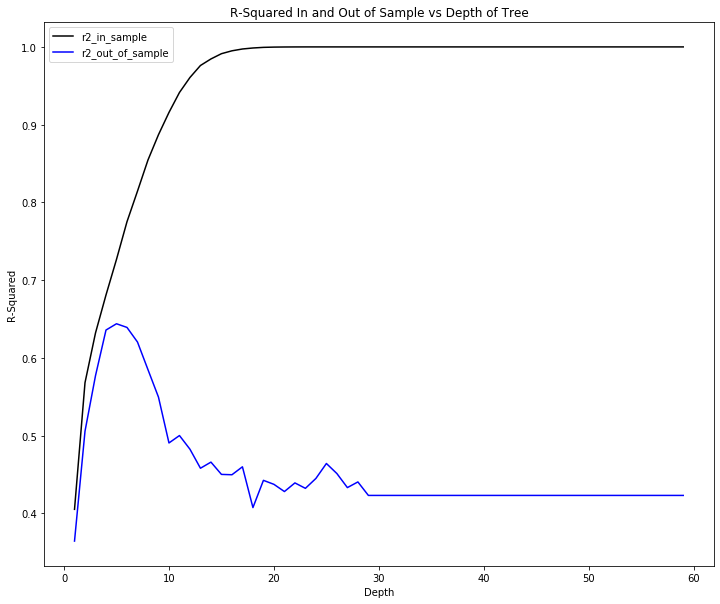

In [142]:
plt.figure(figsize = (12, 10))
plt.plot(mx_depth, r2_is, c= "black", label = "r2_in_sample")
plt.plot(mx_depth, r2_os, c= "b", label = "r2_out_of_sample")
plt.title("R-Squared In and Out of Sample vs Depth of Tree")
plt.xlabel("Depth")
plt.ylabel("R-Squared")
plt.legend()

In [143]:
# Number of trees in random forest
n_estimators = list(range(10, 200, 10))
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = list(range(1, 60))
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]


In [144]:
mx_depth[np.argmax(r2_os)]

5

In [145]:
tree0 = DecisionTreeRegressor(random_state=35)

In [146]:
# Create the random grid
random_grid0 = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': [5, 10, 15, 20],
               'min_samples_leaf': min_samples_leaf,}

In [147]:
tree_random = RandomizedSearchCV(estimator = tree0, param_distributions = random_grid0, 
                               n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)

In [148]:
tree_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 218 out of 500 | elapsed:    4.0s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.3s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=DecisionTreeRegressor(criterion='mse',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort=False,
                                                   random_state=35,
                                                   splitter='best'),
                   iid='warn', n_iter=100, n_jobs=-1,
                   param_distr

In [149]:
tree_random.best_params_

{'min_samples_split': 20,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 6}

In [150]:
metrics(tree_random, X_train, X_test, y_train, y_test)

R2 in sample is 0.7537416954175881
R2 out of sample is 0.6509320277725539
MSE in sample is 8008224.607930819
MSE out of sample is 12106255.681165371
MAE in sample is 1538.4320286531579
MAE out of sample is 1836.9187187171487


[Text(200.68977272727273, 201.90857142857143, 'X[1] <= 0.77\nmse = 32519612.37\nsamples = 2000\nvalue = 5762.042'),
 Text(115.0875, 170.84571428571428, 'X[1] <= 0.123\nmse = 11835314.794\nsamples = 1498\nvalue = 3660.758'),
 Text(60.872727272727275, 139.78285714285715, 'X[3] <= 4.989\nmse = 5821429.413\nsamples = 866\nvalue = 2314.987'),
 Text(30.436363636363637, 108.72, 'X[9] <= 0.5\nmse = 2548338.199\nsamples = 457\nvalue = 1516.094'),
 Text(15.218181818181819, 77.65714285714284, 'X[1] <= 0.053\nmse = 1983837.003\nsamples = 226\nvalue = 1161.477'),
 Text(7.609090909090909, 46.59428571428572, 'X[4] <= 46.5\nmse = 1728407.088\nsamples = 199\nvalue = 1006.842'),
 Text(3.8045454545454547, 15.531428571428563, 'mse = 12715715.908\nsamples = 5\nvalue = 3783.833'),
 Text(11.413636363636364, 15.531428571428563, 'mse = 1241351.905\nsamples = 194\nvalue = 935.27'),
 Text(22.827272727272728, 46.59428571428572, 'X[4] <= 98.0\nmse = 2391243.878\nsamples = 27\nvalue = 2301.199'),
 Text(19.022727272

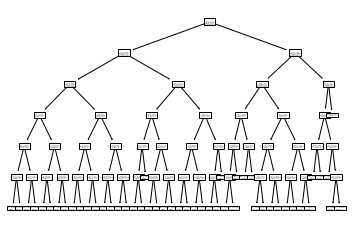

In [169]:
tree.plot_tree(tree_random.best_estimator_)

Deicision trees don't perform very well out of sample, in sample they can perform amazingly but not out of sample.

### Random Forest

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [48]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [49]:
rf_reg = RandomForestRegressor(random_state=0)

In [80]:
rf_random = RandomizedSearchCV(estimator = rf_reg, param_distributions = random_grid, 
                               n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)

In [81]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:   21.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   32.2s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [82]:
rf_random.best_params_

{'n_estimators': 120,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': False}

In [83]:
metrics(rf_random, X_train, X_test, y_train, y_test)

R2 in sample is 0.9707238709729297
R2 out of sample is 0.6888149627978262
MSE in sample is 952048.3676564982
MSE out of sample is 10792412.722608022
MAE in sample is 460.8773979526916
MAE out of sample is 1772.263167662567


### Gradient Boosting

In [41]:
from sklearn.ensemble import GradientBoostingRegressor

In [74]:
random_grid2 = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
    
               #'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001]}

In [75]:
gbm_reg = GradientBoostingRegressor(random_state=0, learning_rate = 0.05)

In [76]:
gbm_random = RandomizedSearchCV(estimator = gbm_reg, param_distributions = random_grid2, 
                               n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)

In [77]:
gbm_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done 358 tasks      | elapsed:   55.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.5min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=GradientBoostingRegressor(alpha=0.9,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.05,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                           

In [78]:
gbm_random.best_params_

{'n_estimators': 140,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 4}

In [79]:
metrics(gbm_random, X_train, X_test, y_train, y_test)

R2 in sample is 0.8209224058011052
R2 out of sample is 0.7112981858987214
MSE in sample is 5823533.947512863
MSE out of sample is 10012657.290852834
MAE in sample is 1408.647112082684
MAE out of sample is 1747.7458444796553


# Neural Network

In [84]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

def plot_model_in_notebook(model):
    return SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))


from sklearn.preprocessing import normalize

In [100]:
X_train1 = pd.concat([X_train.drop("budget", axis = 1)/X_train.drop("budget", axis = 1).std(), X_train["budget"]], axis = 1)
X_test1 = pd.concat([X_test.drop("budget", axis = 1)/X_test.drop("budget", axis = 1).std(), X_test["budget"]], axis = 1)


In [101]:
X_train1 = pd.DataFrame(X_train1/X_train1.max(axis = 0))
X_test1 = pd.DataFrame(X_test1/X_test1.max(axis = 0))
y_train1 = y_train1/y_train1.max(axis = 0)
y_test1= y_test1/y_test1.max(axis = 0)

In [120]:
K.clear_session()


digit_input = Input(shape=(X_train.shape[1],), name='digit_input')



x = Dense(25, activation='tanh')(digit_input)
xx = Dense(15, activation='tanh')(x)
#z = Dense(5, activation='tanh')(xx)
y = Dropout(0.35)(xx)

output = Dense(1, activation = 'linear')(y)
model = Model(digit_input, output)
model.compile(optimizer = 'adam', loss='MSE',  metrics=['MSE'])


In [170]:
#plot_model_in_notebook(model)

In [122]:
model.fit(
    X_train1, y_train1, 
    batch_size=128, 
    epochs=50, 
    shuffle=True)

Epoch 1/50
2000/2000 [==============================] - 0s 73us/step - loss: 0.0585 - MSE: 0.0585
Epoch 2/50
2000/2000 [==============================] - 0s 8us/step - loss: 0.0357 - MSE: 0.0357
Epoch 3/50
2000/2000 [==============================] - 0s 8us/step - loss: 0.0278 - MSE: 0.0278
Epoch 4/50
2000/2000 [==============================] - 0s 8us/step - loss: 0.0211 - MSE: 0.0211
Epoch 5/50
2000/2000 [==============================] - 0s 8us/step - loss: 0.0193 - MSE: 0.0193
Epoch 6/50
2000/2000 [==============================] - 0s 8us/step - loss: 0.0169 - MSE: 0.0169
Epoch 7/50
2000/2000 [==============================] - 0s 7us/step - loss: 0.0165 - MSE: 0.0165
Epoch 8/50
2000/2000 [==============================] - 0s 7us/step - loss: 0.0144 - MSE: 0.0144
Epoch 9/50
2000/2000 [==============================] - 0s 7us/step - loss: 0.0142 - MSE: 0.0142
Epoch 10/50
2000/2000 [==============================] - 0s 8us/step - loss: 0.0131 - MSE: 0.0131
Epoch 11/50
2000/2000 [=====

In [124]:
metrics(model, X_train1, X_test1, y_train1, y_test1)

R2 in sample is 0.6900525231151728
R2 out of sample is 0.659816024404519
MSE in sample is 0.006633094887035928
MSE out of sample is 0.00934220571682359
MAE in sample is 0.044622060988219386
MAE out of sample is 0.05548630447895405
